# Pytorch Workflow Fundamentals

Getting data ready --> Building a model --> Fitting the model to data (training) --> Making Predictions and evaluating a model (inference) --> Saving and loading a model --> Putting it all together

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
torch.__version__

'2.0.1+cu118'

# Data

In [4]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [5]:
#train test split
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:],  y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [6]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c = "b", s = 10, label = "Training data")
    plt.scatter(test_data, test_labels, c = "g", s = 10, label = "Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c = "r", s = 10, label = "Predictions")
    plt.legend(prop={"size": 14})

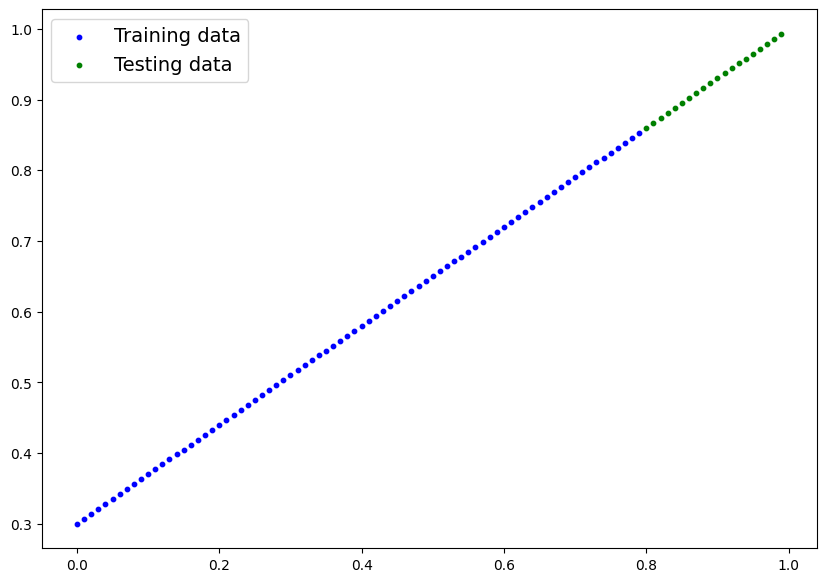

In [7]:
plot_predictions()

# Model Building

In [8]:
#model building
#nn.Module is the base class
#any other models would be the subclass of nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype = torch.float32, requires_grad = True))
        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float32, requires_grad = True))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [9]:
#declaring the model with random seed
torch.manual_seed(42)
model_0 = LinearRegressionModel()

In [10]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
#model parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
#model predictions
with torch.inference_mode():
    y_preds = model_0(X_test)

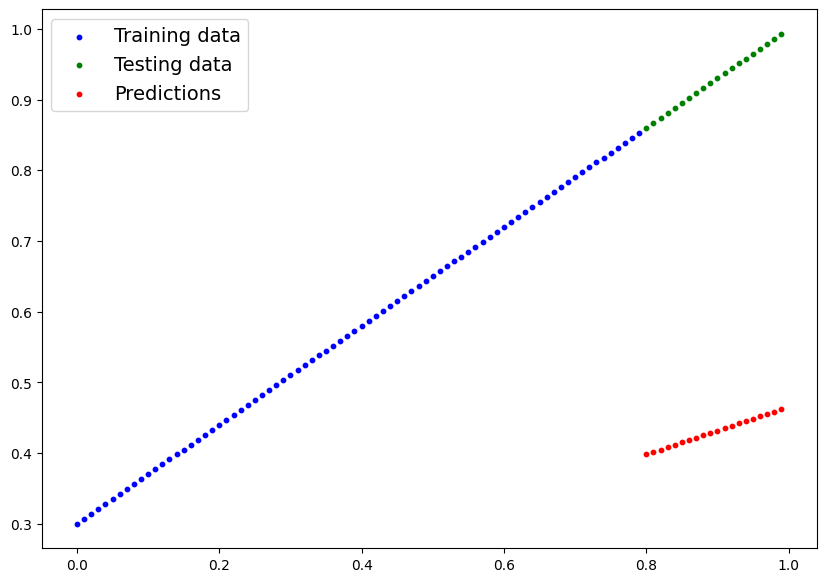

In [13]:
plot_predictions(predictions = y_preds)

In [14]:
y_test - y_preds

tensor([[0.4618],
        [0.4655],
        [0.4691],
        [0.4727],
        [0.4764],
        [0.4800],
        [0.4836],
        [0.4873],
        [0.4909],
        [0.4945],
        [0.4982],
        [0.5018],
        [0.5054],
        [0.5091],
        [0.5127],
        [0.5163],
        [0.5200],
        [0.5236],
        [0.5272],
        [0.5309]])

In [15]:
#loss functions
#L1Loss --> regression loss
#BCELoss --> binary cross entropy
loss_fn = nn.L1Loss()

In [16]:
#optimiser to upgrade the parameters
#commonly used --> stochastic gradient descent (SGD), adam
optimizer  = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [17]:
torch.manual_seed(42)
epochs = 175
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_0.train()
    train_pred = model_0(X_train)
    train_loss = loss_fn(train_pred, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float32))
        if epoch%10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(train_loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {train_loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.31469792127609253 | MAE Test Loss: 0.48281747102737427
Epoch: 10 | MAE Train Loss: 0.19909533858299255 | MAE Test Loss: 0.3474648892879486
Epoch: 20 | MAE Train Loss: 0.08958515524864197 | MAE Test Loss: 0.21752354502677917
Epoch: 30 | MAE Train Loss: 0.05288771912455559 | MAE Test Loss: 0.1439102590084076
Epoch: 40 | MAE Train Loss: 0.045192889869213104 | MAE Test Loss: 0.11271438747644424
Epoch: 50 | MAE Train Loss: 0.04140976816415787 | MAE Test Loss: 0.09821617603302002
Epoch: 60 | MAE Train Loss: 0.03795855492353439 | MAE Test Loss: 0.0888485461473465
Epoch: 70 | MAE Train Loss: 0.034532517194747925 | MAE Test Loss: 0.08085694909095764
Epoch: 80 | MAE Train Loss: 0.03110707364976406 | MAE Test Loss: 0.07252134382724762
Epoch: 90 | MAE Train Loss: 0.027681414037942886 | MAE Test Loss: 0.06452975422143936
Epoch: 100 | MAE Train Loss: 0.02425537072122097 | MAE Test Loss: 0.05653815343976021
Epoch: 110 | MAE Train Loss: 0.02082989364862442 | MAE Test Loss:

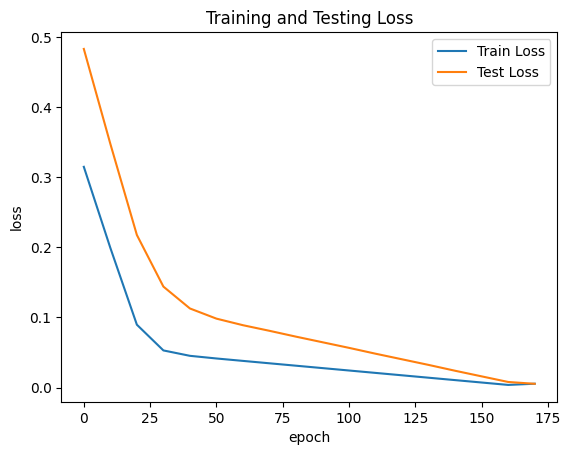

In [18]:
plt.plot(epoch_count, train_loss_values, label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("Training and Testing Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

In [19]:
model_0.eval()
with torch.inference_mode():
    predictions = model_0(X_test)
predictions

tensor([[0.8655],
        [0.8724],
        [0.8794],
        [0.8864],
        [0.8934],
        [0.9004],
        [0.9073],
        [0.9143],
        [0.9213],
        [0.9283],
        [0.9353],
        [0.9423],
        [0.9492],
        [0.9562],
        [0.9632],
        [0.9702],
        [0.9772],
        [0.9842],
        [0.9911],
        [0.9981]])

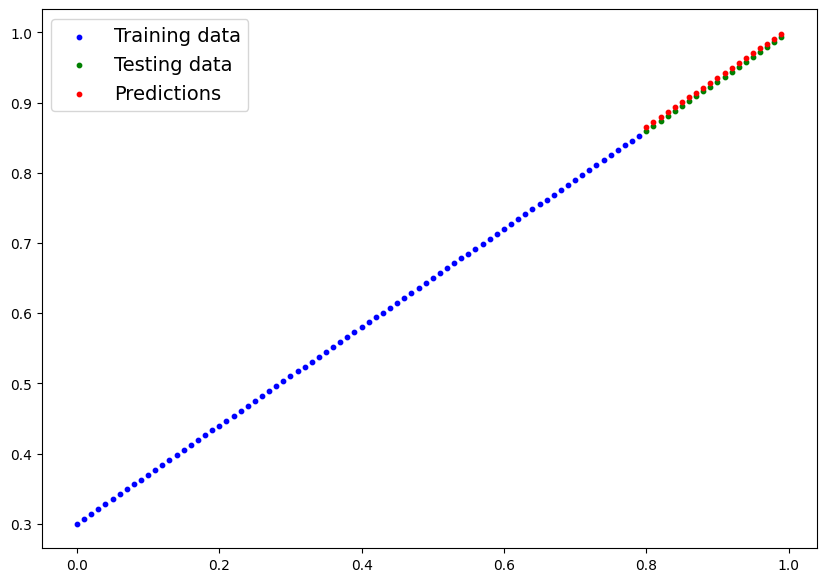

In [20]:
plot_predictions(predictions = predictions)

# Save and Load Model

In [21]:
from pathlib import Path
model_path = Path("models")
model_path.mkdir(parents = True, exist_ok = True)

In [22]:
model_name = "pytorch_01_workflow.pth"
model_save_path = model_path/model_name

In [23]:
print(f"Saving model to: {model_save_path}")
torch.save(obj=model_0.state_dict(), f=model_save_path) 

Saving model to: models\pytorch_01_workflow.pth


In [24]:
loaded_model = LinearRegressionModel()

In [25]:
loaded_model.load_state_dict(torch.load(model_save_path))

<All keys matched successfully>

In [26]:
loaded_model

LinearRegressionModel()

In [27]:
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)

In [28]:
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])